In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [4]:
cust_data = pd.read_csv("E:\data_science_classes\CC_GENERAL.csv")

In [5]:
cust_data.shape

(8950, 18)

In [6]:
cust_data.head(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12


In [7]:
#we can see that all of our independent variables except "cust_id" are numeric. 

### Missing Value Treatment

In [10]:
for i in cust_data.columns.difference(["CUST_ID"]):
    cust_data[i] = cust_data[i].fillna(cust_data[i].mean())

In [17]:
cust_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [18]:
cust_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Deriving New KPI

In [20]:
#1. monthly average purchase

In [21]:
cust_data['Monthly_avg_purchase']=cust_data['PURCHASES']/cust_data['TENURE']

In [24]:
print(cust_data['Monthly_avg_purchase'].head(),'\n ',
cust_data['TENURE'].head(),'\n', cust_data['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


In [26]:
# 2. Monthly_cash_advance

In [25]:
cust_data['Monthly_cash_advance']=cust_data['CASH_ADVANCE']/cust_data['TENURE']

In [28]:
#3. Purchase_type
#To find what type of purchases customers are making on credit card

In [31]:
cust_data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(7)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38


In [34]:
def purchase(df_cust):
    if (df_cust['ONEOFF_PURCHASES']==0) & (df_cust['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df_cust['ONEOFF_PURCHASES']>0) & (df_cust['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df_cust['ONEOFF_PURCHASES']>0) & (df_cust['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df_cust['ONEOFF_PURCHASES']==0) & (df_cust['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
    

In [35]:
cust_data['purchase_type']=cust_data.apply(purchase,axis=1)

In [ ]:
#4. Limit_usage (shows credit-score ) credit card utilization
#Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [38]:
cust_data['limit_usage']=cust_data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
cust_data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [39]:
cust_data['payment_minpay_ratio']=cust_data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [40]:
cust_data['payment_minpay_ratio'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay_ratio, dtype: float64

In [41]:
cust_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
payment_minpay_ratio            

In [43]:
#cust_id has all distinct values, so we will remove it's column

In [44]:
cust_data.drop("CUST_ID", axis = 1, inplace = True)

In [46]:
cust_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay_ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,istallment,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075


### Treating The Outliers

In [47]:
#now we will take the log of numerical variables for the outlier treatmnt 

In [48]:
cust_log_num=cust_data.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [49]:
cust_log_num.shape

(8950, 21)

In [51]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cust_pre=cust_log_num[[x for x in cust_log_num.columns if x not in col ]]

In [55]:
cust_pre.shape

(8950, 13)

### Insights from new KPIs

In [64]:
# Average payment_minpayment ratio for each purchse type.
x=cust_data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay_ratio']))
x

purchase_type
both_oneoff_installment     7.231176
istallment                 13.245074
none                       10.076701
one_off                     5.498136
dtype: float64

In [68]:
ax.barh?

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

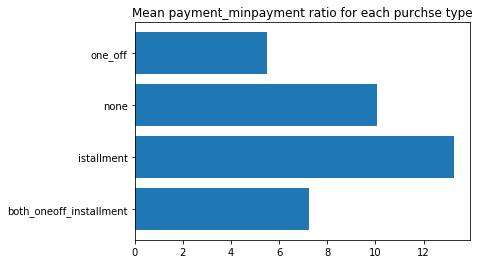

In [65]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


the above plot suggests that customers with installment purchases are paying dues

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

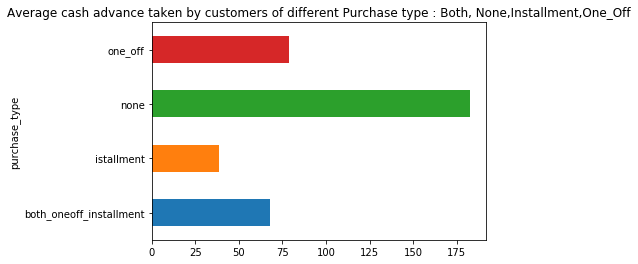

In [69]:
cust_data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

the above plot suggests that Customers who don't do either one-off or installment purchases take more cash on advance

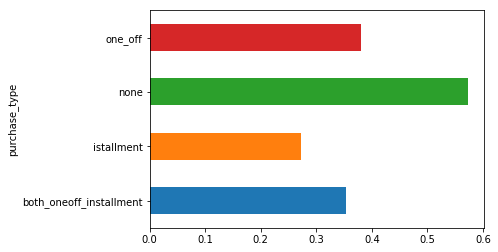

In [71]:
cust_data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

the above plot shows that Customers with installment purchases have good credit score

### Preparation of data for Machine learning

In [81]:
# creating Dummies for categorical variable
cust_pre['purchase_type']=cust_data.loc[:,'purchase_type']
cust_dummy=pd.get_dummies(cust_pre['purchase_type'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
cust_new=pd.concat([cust_pre,cust_dummy],axis=1)

In [84]:
cust_new.drop('purchase_type',axis =1, inplace =True)

In [86]:
cust_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


We will now check the correlation between the variables

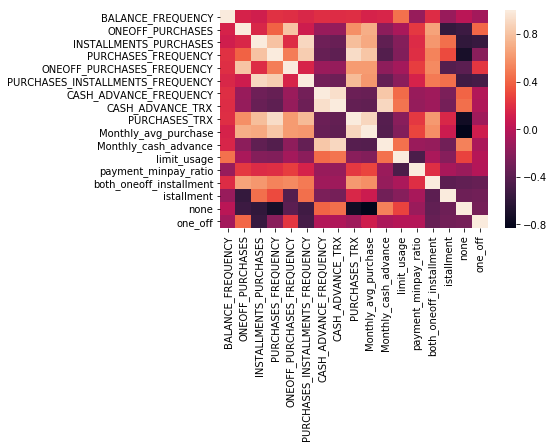

In [87]:
sns.heatmap(cust_new.corr())

the above heatmap shows that we have multiple variables with multicollinearity, so we will dimensionality reduction to eliminate it.

In [89]:
#we will standardise our data by scaling before we go with the PCA

In [90]:
from sklearn.preprocessing import  StandardScaler

In [91]:
sc=StandardScaler()

In [92]:
cust_scaled=sc.fit_transform(cust_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
cust_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [95]:
cust_new.shape

(8950, 17)

### Applying PCA

In [94]:
from sklearn.decomposition import PCA

In [96]:
pc=PCA(n_components=17)
cust_pca=pc.fit(cust_scaled)

In [97]:
sum(cust_pca.explained_variance_ratio_)

0.9999999999999999

In [ ]:
#finding out the variance ratio for a range of variables

In [98]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cust_pca=pc.fit(cust_scaled)
    var_ratio[n]=sum(cust_pca.explained_variance_ratio_)

In [99]:
var_ratio

{2: 0.582645155406391,
 3: 0.7298345406355163,
 4: 0.8111335992350022,
 5: 0.87655825319855,
 6: 0.9186927883289482,
 7: 0.941149423738705,
 8: 0.9616131493046625,
 9: 0.9739809893129773,
 10: 0.9835844723916962,
 11: 0.9897244591771945,
 12: 0.9927552874772534,
 13: 0.9953908392341264,
 14: 0.9979616763385537,
 15: 0.9996360470426322,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

In [101]:
#this shows that 6 components are having more than 90% of variance, so we will select 6 components now

In [102]:
pc=PCA(n_components=6)

In [103]:
p=pc.fit(cust_scaled)

In [104]:
p.explained_variance_ 
#only 6 components are taken out of 17

array([6.83533324, 3.07074123, 2.50249916, 1.38223844, 1.1123434 ,
       0.71636714])

In [115]:
#finding the eagen value of 6 components

In [105]:
np.sum(p.explained_variance_)

15.619522599647937

In [107]:
pc_final=PCA(n_components=6).fit(cust_scaled)

reduced_cust=pc_final.fit_transform(cust_scaled)

In [109]:
seg_data = pd.DataFrame(reduced_cust)
seg_data.head()

,0,1,2,3,4,5
0,-0.242944,-2.760785,0.351361,-0.401614,-0.005484,0.007605
1,-3.975266,0.148735,-0.547959,1.028855,-0.418437,-0.568251
2,1.288318,1.507531,2.716051,-1.880704,-0.005185,-0.591734
3,-1.047033,0.670834,2.508175,-1.306821,0.753048,1.399861
4,-1.451302,-0.173798,2.291291,-1.606464,-0.577955,-0.699099


In [119]:
seg_data.shape

(8950, 6)

In [112]:
col_list=cust_new.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [113]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.030022,0.239460,-0.262472,-0.349273,-0.232518,-0.693531
ONEOFF_PURCHASES,0.214170,0.406202,0.238641,0.001183,-0.023161,0.128678
INSTALLMENTS_PURCHASES,0.312078,-0.098990,-0.315587,0.086934,-0.001464,0.114002
PURCHASES_FREQUENCY,0.345861,0.015281,-0.162680,-0.076637,0.114846,-0.078558
ONEOFF_PURCHASES_FREQUENCY,0.214778,0.362314,0.162690,0.036747,-0.050722,-0.091641
PURCHASES_INSTALLMENTS_FREQUENCY,0.295470,-0.112655,-0.329909,0.021816,0.025601,0.008325
CASH_ADVANCE_FREQUENCY,-0.214255,0.285960,-0.279823,0.090296,0.360688,0.068781
CASH_ADVANCE_TRX,-0.229307,0.291441,-0.286339,0.097661,0.333356,0.084039
PURCHASES_TRX,0.355560,0.106184,-0.102734,-0.056154,0.104178,-0.007888
Monthly_avg_purchase,0.346029,0.141399,0.023945,-0.081779,0.193225,0.015556


In [114]:
pc_final.components_

array([[ 0.03002162,  0.21417045,  0.31207785,  0.34586106,  0.21477756,
         0.29546965, -0.21425512, -0.22930743,  0.35556037,  0.34602876,
        -0.24378194, -0.14614992,  0.11933438,  0.24147575,  0.08214178,
        -0.31027988, -0.04216368],
       [ 0.23945967,  0.40620185, -0.09899024,  0.01528109,  0.36231351,
        -0.11265504,  0.28596013,  0.29144134,  0.10618449,  0.14139946,
         0.2642985 ,  0.2348603 ,  0.02578218,  0.27339888, -0.44380194,
        -0.00486989,  0.16815319],
       [-0.2624717 ,  0.23864058, -0.3155869 , -0.16267975,  0.16269003,
        -0.32990868, -0.27982284, -0.28633858, -0.10273379,  0.02394507,
        -0.25864895, -0.25092028,  0.13202121, -0.13266973, -0.20768348,
        -0.09749747,  0.47312175],
       [-0.34927321,  0.00118282,  0.08693437, -0.07663715,  0.03674677,
         0.02181584,  0.09029593,  0.09766113, -0.05615441, -0.08177899,
         0.13055268, -0.43392289,  0.59031319,  0.25641218, -0.19370249,
         0.24864084

In [116]:
#the data above shows us the eigen vectors for each component and none of the eigen vector is too small to be dropped.

In [118]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402034
PC_1    0.180612
PC_2    0.147189
PC_3    0.081299
PC_4    0.065425
PC_5    0.042135
dtype: float64

We will do the clustering now

In [1]:
### we will start with 4 clusters as it's an assumed value based on insights derived from EDA.

In [122]:
from sklearn.cluster import KMeans

In [127]:
km_4=KMeans(n_clusters=4,random_state=12)

In [128]:
km_4.fit(reduced_cust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

In [129]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [130]:
pd.Series(km_4.labels_).value_counts()


3    2769
2    2224
1    2088
0    1869
dtype: int64

In [131]:
#finding the cluster error

In [132]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cust )
    cluster_errors.append( clusters.inertia_)

In [133]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139779.107744
1,2,93321.027805
2,3,70746.572573
3,4,49452.191191
4,5,42556.576368
5,6,37725.230976
6,7,34142.987566
7,8,31571.041572
8,9,28628.172184
9,10,26336.180898


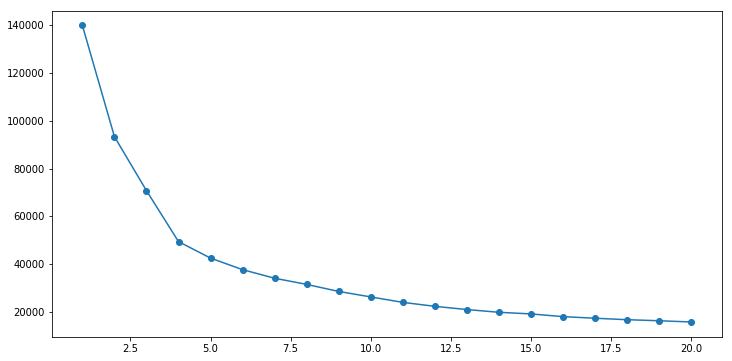

In [134]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#from the plot above, we can say that the elbow shows the clusters can be 2,3,4

In [135]:
#finding the Silhouette Coefficient

In [136]:
from sklearn import metrics

In [137]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=13)
    km.fit(reduced_cust)
    scores.append(metrics.silhouette_score(reduced_cust, km.labels_))

In [138]:
scores

[0.3318714523325336,
 0.3539835947644523,
 0.4369935543668932,
 0.43108725212231824,
 0.4227364660318967,
 0.4019866785258295,
 0.41805385002424555,
 0.3902558121543205,
 0.36458593090603786,
 0.3770216530747726,
 0.35166582500654925,
 0.3523377684772629,
 0.3517409614760341,
 0.34115978348694864,
 0.3340554012013719,
 0.3215497886524114,
 0.33447196731847967,
 0.3259326223724769,
 0.31900994375405783]

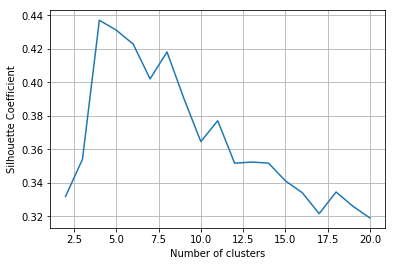

In [139]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [140]:
#as we have the max Silhouette Coefficient with 4 clusters, we will be using k = 4

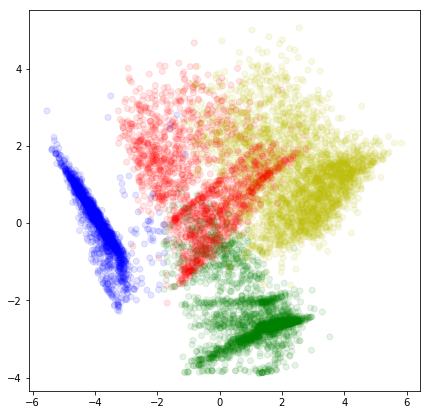

In [141]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cust[:,0],reduced_cust[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [142]:
#we can also plot all components with clusters

In [143]:
df_pair_plot=pd.DataFrame(reduced_cust,columns=['PC_' +str(i) for i in range(6)])

In [144]:
df_pair_plot['Cluster']=km_4.labels_

In [145]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242944,-2.760785,0.351361,-0.401614,-0.005484,0.007605,2
1,-3.975266,0.148735,-0.547959,1.028855,-0.418437,-0.568251,1
2,1.288318,1.507531,2.716051,-1.880704,-0.005185,-0.591734,0
3,-1.047033,0.670834,2.508175,-1.306821,0.753048,1.399861,0
4,-1.451302,-0.173798,2.291291,-1.606464,-0.577955,-0.699099,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

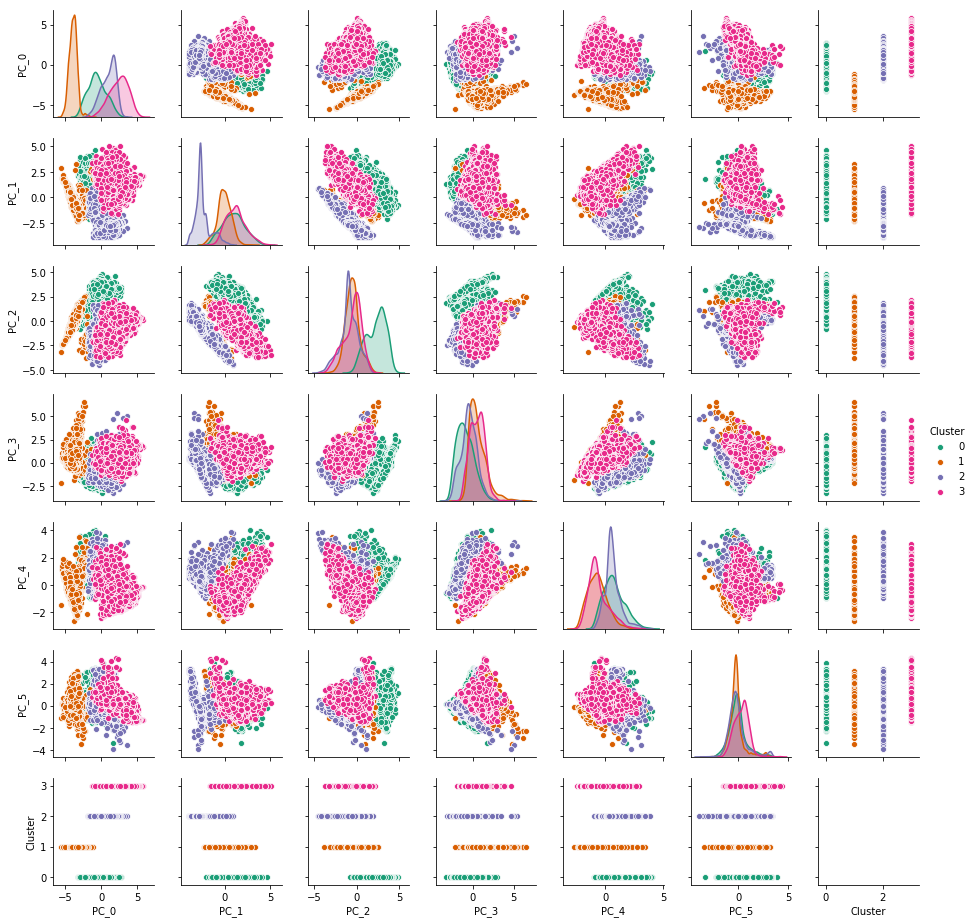

In [146]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

It shows that first two components are able to indentify clusters.

In [173]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay_ratio','both_oneoff_installment','istallment','one_off','none',"CREDIT_LIMIT"]

In [174]:
cust_original=pd.concat([cust_data,cust_dummy],axis=1)

In [175]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cust_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [176]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay_ratio,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [179]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4


Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576075,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay_ratio,5.500532,9.926104,13.408265,7.239835
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
istallment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


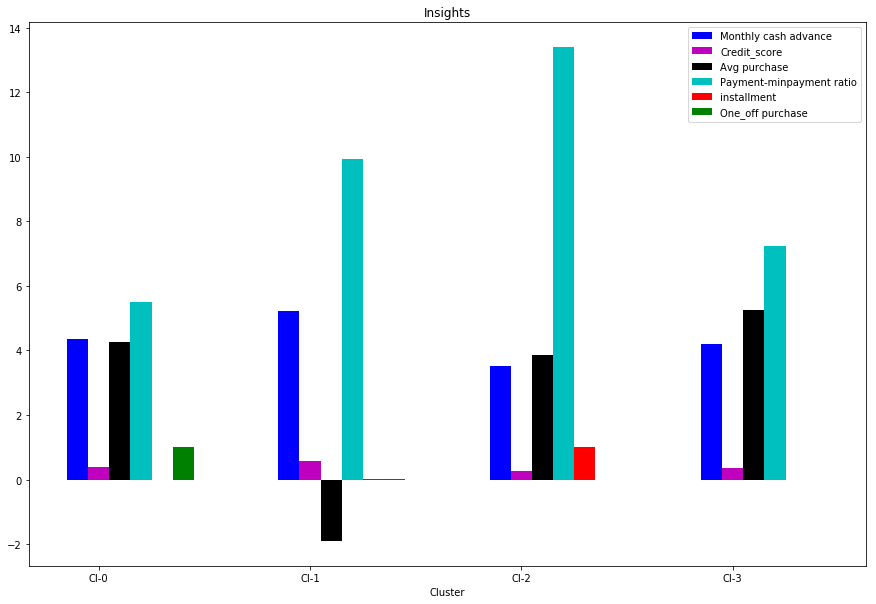

In [181]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay_ratio',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

### ** Insights**

#### Clusters are clearly distinguishing behavior within customers.

#### Cluster 3 is the group of customers who have highest Monthly_avg purchases and have  comparatively lower payment-minimum payment ratio, have average credit score. * This group is about 31% of the total customer base *

#### cluster 1 is taking maximum advance_cash and is paying comparatively good minimum payment and has lower credit_score & doing no purchase transaction. * This group is about 23% of the total customer base *

### Cluster 0 customers are doing maximum One_Off transactions and least payment ratio and credit_score on lower side * This group is about 21% of the total customer base *

#### Cluster 2 customers have maximum credit score and are paying dues and are doing maximum installment purchases. * This group is about 25% of the total customer base * 

In [187]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.s hape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))


Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547


### Marketing Strategy Suggested:
### a. Group 2
### They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions

### b. Group 1
### They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase transaction

### c. Group 0
### This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

### d. Group 3
### This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.